In [395]:
import os

%matplotlib inline
import string
from collections import deque

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# data
from sklearn import datasets
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_extraction.text import CountVectorizer

# Feature selection
from sklearn.feature_selection import RFE, RFECV
from sklearn.impute import SimpleImputer

# classifiers / models
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression

# other
from sklearn.metrics import accuracy_score, log_loss, make_scorer, mean_squared_error
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    ShuffleSplit,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    PolynomialFeatures,
    StandardScaler,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# from sklearn.svm import SVC, SVR
# import seaborn as sns
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.linear_model import SGDClassifier
# from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


## Summary of the data set
The data set used in this project is the results of a chemical analysis of the Portuguese "Vinho Verde" wine, conducted by [Paulo Cortez, University of Minho, Guimarães,
Portugal](http://www3.dsi.uminho.pt/pcortez) A. Cerdeira, F. Almeida, T.
Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal @2009. It was sourced from the [UCI Machine
Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine+quality).

There are two datasets for red and white wine samples. For each wine sample observation , the inputs contains measurements of various objective physicochemical tests, and the output is the median wine quality ratings given by experts on the scale from 0 (very bad) and 10 (very excellent).The author notes that data on grape types, wine brand, wind selling price among other are not available due to privacy and logistics issues. There are 1599 observations for red wine and 4898 observations of white wine.

## Data Import

In [368]:
red_wine = pd.read_csv('winequality-red.csv',delimiter = ';')
white_wine = pd.read_csv('winequality-white.csv',delimiter = ';')

After importing the downloaded data,  the below tables show the summary statistics of all numeric features in the white wine data set. 

In [369]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Similar table for red wine data set

In [370]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Base on the brief summary of the data above, there is no missing value, all the features have numeric values, hence there is no major preprocessing needed. We decide to combine the two data sets of red wine and white wine to consider wine type (i.e. red or wine) as another possible features that could link to wine quality. Below is the combined data set.

In [371]:
white_wine['type'] = 'white'
red_wine['type'] = 'red'
wine_df = pd.concat([white_wine, red_wine], axis = 0)
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [372]:
bins = (1, 4, 6, 9)
rating_groups = [0,1,2]
wine_df['quality'] = pd.cut(wine_df['quality'], bins = bins, labels = rating_groups)
wine_df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1,white
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1,white
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1,white
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1,white
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1,red


## MODEL BUILDING

### Data splitting

In [373]:
train_df, test_df = train_test_split(wine_df,test_size = 0.2 , random_state = 123)

#train_df['type'] = train_df['type'].astype('category')
#test_df['type'] = test_df['type'].astype('category')
X_train = train_df.drop(columns = ['quality'], axis=1)
y_train = train_df['quality']

X_test = test_df.drop(columns = ['quality'], axis=1)
y_test = test_df['quality']


In [394]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
1554,6.6,0.855,0.02,2.4,0.062,15.0,23.0,0.99627,3.54,0.60,11.0,red
212,11.6,0.440,0.64,2.1,0.059,5.0,15.0,0.99800,3.21,0.67,10.2,red
2792,6.8,0.260,0.44,8.2,0.046,52.0,183.0,0.99584,3.20,0.51,9.4,white
1879,7.2,0.200,0.61,16.2,0.043,14.0,103.0,0.99870,3.06,0.36,9.2,white
2742,8.0,0.230,0.28,2.7,0.048,49.0,165.0,0.99520,3.26,0.72,9.5,white
...,...,...,...,...,...,...,...,...,...,...,...,...
320,9.8,0.660,0.39,3.2,0.083,21.0,59.0,0.99890,3.37,0.71,11.5,red
4060,6.4,0.410,0.01,6.1,0.048,20.0,70.0,0.99362,3.19,0.42,10.0,white
1346,7.0,0.460,0.39,6.2,0.039,46.0,163.0,0.99280,3.21,0.35,12.2,white
3454,5.8,0.540,0.00,1.4,0.033,40.0,107.0,0.98918,3.26,0.35,12.4,white


In [375]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5197 entries, 1554 to 3582
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         5197 non-null   float64 
 1   volatile acidity      5197 non-null   float64 
 2   citric acid           5197 non-null   float64 
 3   residual sugar        5197 non-null   float64 
 4   chlorides             5197 non-null   float64 
 5   free sulfur dioxide   5197 non-null   float64 
 6   total sulfur dioxide  5197 non-null   float64 
 7   density               5197 non-null   float64 
 8   pH                    5197 non-null   float64 
 9   sulphates             5197 non-null   float64 
 10  alcohol               5197 non-null   float64 
 11  quality               5197 non-null   category
 12  type                  5197 non-null   object  
dtypes: category(1), float64(11), object(1)
memory usage: 533.0+ KB


### PreProcessor

In [376]:
numeric_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                   'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
binary_features = ['type']

numeric_transformer = make_pipeline(SimpleImputer(), StandardScaler())
binary_transformer = make_pipeline(OneHotEncoder(drop="if_binary", dtype=int))

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('bin', binary_transformer, binary_features)
    ]
)

In [377]:
#X_train = X_train.drop(columns = ['type'], axis  =0)
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
1554,6.6,0.855,0.02,2.4,0.062,15.0,23.0,0.99627,3.54,0.60,11.0,red
212,11.6,0.440,0.64,2.1,0.059,5.0,15.0,0.99800,3.21,0.67,10.2,red
2792,6.8,0.260,0.44,8.2,0.046,52.0,183.0,0.99584,3.20,0.51,9.4,white
1879,7.2,0.200,0.61,16.2,0.043,14.0,103.0,0.99870,3.06,0.36,9.2,white
2742,8.0,0.230,0.28,2.7,0.048,49.0,165.0,0.99520,3.26,0.72,9.5,white
...,...,...,...,...,...,...,...,...,...,...,...,...
320,9.8,0.660,0.39,3.2,0.083,21.0,59.0,0.99890,3.37,0.71,11.5,red
4060,6.4,0.410,0.01,6.1,0.048,20.0,70.0,0.99362,3.19,0.42,10.0,white
1346,7.0,0.460,0.39,6.2,0.039,46.0,163.0,0.99280,3.21,0.35,12.2,white
3454,5.8,0.540,0.00,1.4,0.033,40.0,107.0,0.98918,3.26,0.35,12.4,white


In [385]:
#DataStructure to store results
results_df={}
def store_cross_val_results(model_name, scores, results_dict):
    """
    Stores mean scores from cross_validate in results_dict for
    the given model model_name.

    Parameters
    ----------
    model_name :
        scikit-learn classification model
    scores : dict
        object return by `cross_validate`
    results_dict: dict
        dictionary to store results

    Returns
    ----------
        None

    """
    results_dict[model_name] = {
        "mean_fit_time": "{:0.4f}".format(np.mean(scores["fit_time"])),
        "mean_score_time ": "{:0.4f}".format(np.mean(scores["score_time"])),
        "mean_test_score ": "{:0.4f}".format(np.mean(scores["test_score"])),
        "mean_train_score ": "{:0.4f}".format(np.mean(scores["train_score"])),
    }

<h>
    
### Model Selection
    
<h>

In [396]:
classifiers = {
    "RidgeClassifier": RidgeClassifier(),
    "Logistic Regression": OneVsRestClassifier(LogisticRegression(max_iter=2000,random_state=0, multi_class='multinomial')),
    "Random Forest":RandomForestClassifier(n_estimators=200),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "onevr_linear_svc": OneVsRestClassifier(LinearSVC(random_state=0)),
    "MLP Classifier":MLPClassifier(random_state=1, max_iter=300),
    "Nearest Centroid": NearestCentroid(),
    "QDA" :QuadraticDiscriminantAnalysis()
}

In [ ]:
for classifier_name, classifier in classifiers.items():
    pipe_iter = make_pipeline(preprocessor, classifier)
    scores_iter = cross_validate(pipe_iter, X_train, y_train, 
                         return_train_score=True,)
    store_cross_val_results(f"preprocessing + {classifier_name}", scores_iter, results_df)

In [398]:
pd.DataFrame(results_df).T

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score
preprocessing + RidgeClassifier,0.0147,0.0061,0.7791,0.7823
preprocessing + Logistic Regression,0.1197,0.0082,0.7818,0.7848
preprocessing + Random Forest,1.4482,0.0607,0.8426,1.0000
preprocessing + KNN,0.0163,0.0904,0.8001,0.8550
preprocessing + onevr_linear_svc,0.7986,0.0063,0.7806,0.7821
preprocessing + MLP Classifier,5.9364,0.0064,0.8012,0.8487
preprocessing + Nearest Centroid,0.0114,0.0065,0.5020,0.5040
preprocessing + QDA,0.0171,0.0051,0.7152,0.7232


### HyperParameter Optimization

In [406]:
rf_pipeline = make_pipeline(
    preprocessor, MLPClassifier())

param_dist = {
    'mlpclassifier__hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'mlpclassifier__activation': ['tanh', 'relu'],
    'mlpclassifier__solver': ['sgd', 'adam'],
    'mlpclassifier__alpha': [0.0001, 0.05],
    'mlpclassifier__learning_rate': ['constant','adaptive'],
    'mlpclassifier__max_iter': [300,500,450,200,300]
}

In [407]:
random_search = RandomizedSearchCV(rf_pipeline, param_distributions=param_dist, n_jobs=-1, n_iter=10_000, cv=10)
random_search.fit(X_train, y_train)

/home/bruhat/miniconda3/envs/573/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer()),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['fixed '
                                                                                'acidity',
                                                                                'volatile '
                                                                                'acidity',


In [408]:
print("Best cv score from grid search: %.3f" % random_search.best_score_)
random_search.best_params_

Best cv score from grid search: 0.819


{'mlpclassifier__solver': 'adam',
 'mlpclassifier__max_iter': 300,
 'mlpclassifier__learning_rate': 'adaptive',
 'mlpclassifier__hidden_layer_sizes': (50, 100, 50),
 'mlpclassifier__alpha': 0.05,
 'mlpclassifier__activation': 'relu'}

## Interpreting Our model

In [409]:
best_model_pipe = random_search.best_estimator_
best_model_pipe.fit(X_train, y_train)
best_model_pipe.score(X_test, y_test)

0.8084615384615385

[[  7  33   4]
 [ 19 883 105]
 [  1  87 161]]


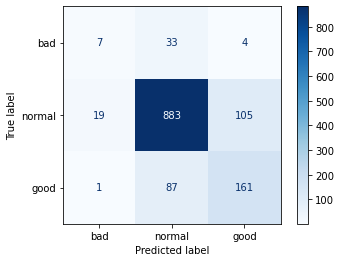

In [410]:
from sklearn.metrics import (plot_confusion_matrix)
plot_confusion_matrix(best_model_pipe, X_test, y_test, display_labels = ['bad', 'normal', 'good'], values_format = 'd', cmap = plt.cm.Blues)
predictions_m = best_model_pipe.predict(X_test)
cm = confusion_matrix(y_test, predictions_m)
print(cm)